# Contrastive learning density estimation

Author: Christoph Weniger, June 2020

In [1]:
import numpy as np
import pylab as plt
import swyft
import torch

In [2]:
DEVICE = 'cuda:0'
NDIM = 4  # Dimensionality of parameter z
NROUNDS = 5  # Optimization rounds

In [3]:
# Generative model, x~p(x|z)
def model(z, sigma = 0.002):
    x = z
    n = np.random.randn(*z.shape)*sigma
    return x + n

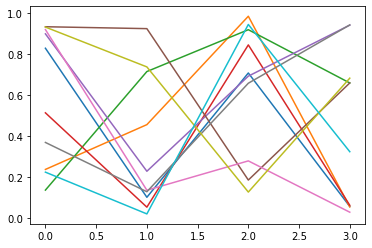

In [4]:
for i in range(10):
    z = np.random.rand(NDIM)
    x = model(z)
    plt.plot(x)

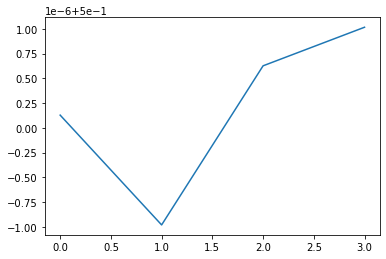

In [5]:
z0 = np.ones(NDIM)*0.5
x0 = model(z0, sigma = 1e-6)
plt.plot(x0)

In [6]:
sw = swyft.SWYFT(model, NDIM, x0, device = DEVICE)

In [7]:
for i in range(NROUNDS):
    sw.round(n_sims = 10000, n_train = 10000, lr = 1e-4, n_particles = 1)

100%|██████████| 10000/10000 [00:00<00:00, 124994.90it/s]

Round:  0
Generate samples from constrained prior: z~pc(z)
Generate corresponding draws x ~ p(x|z)



  0%|          | 0/10000 [00:00<?, ?it/s]

Network optimization


100%|██████████| 10000/10000 [02:24<00:00, 69.27it/s]


Round:  1
Generate samples from constrained prior: z~pc(z)


100%|██████████| 10000/10000 [00:00<00:00, 105745.07it/s]

Constrained posterior volume: 0.00022643712000000002
Generate corresponding draws x ~ p(x|z)



  0%|          | 7/10000 [00:00<02:29, 66.70it/s]

Network optimization


100%|██████████| 10000/10000 [02:32<00:00, 65.64it/s]


Round:  2
Generate samples from constrained prior: z~pc(z)


100%|██████████| 10000/10000 [00:00<00:00, 108815.49it/s]

Constrained posterior volume: 8.034624e-06
Generate corresponding draws x ~ p(x|z)



  0%|          | 6/10000 [00:00<02:48, 59.44it/s]

Network optimization


100%|██████████| 10000/10000 [02:31<00:00, 66.15it/s]


Round:  3
Generate samples from constrained prior: z~pc(z)


100%|██████████| 10000/10000 [00:00<00:00, 105249.39it/s]

Constrained posterior volume: 1.95228e-06
Generate corresponding draws x ~ p(x|z)



  0%|          | 7/10000 [00:00<02:30, 66.59it/s]

Network optimization


100%|██████████| 10000/10000 [02:30<00:00, 66.31it/s]


Round:  4
Generate samples from constrained prior: z~pc(z)


100%|██████████| 10000/10000 [00:00<00:00, 101708.95it/s]

Constrained posterior volume: 2.09664e-06
Generate corresponding draws x ~ p(x|z)



  0%|          | 7/10000 [00:00<02:28, 67.13it/s]

Network optimization


100%|██████████| 10000/10000 [02:33<00:00, 65.08it/s]


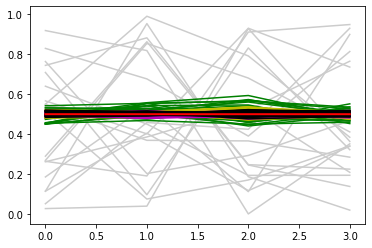

In [8]:
for i, c in enumerate(['0.8', 'g', 'y', 'm', 'k']):
    xz = sw.xz_store[i]
    x = swyft.get_x(xz)
    for spec in x[:20]:
        plt.plot(spec, color=c)
plt.plot(x0, color='r', lw=2)

In [9]:
post = []
for i in range(NROUNDS):
    post.append(sw.get_posteriors(nround=i))

(-5.0, 0.0)

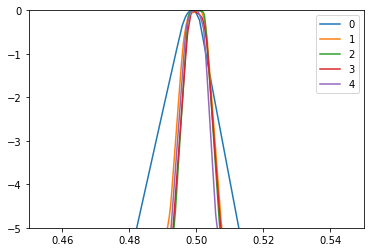

In [10]:
for i in range(NROUNDS):
    #plt.plot(post[i][0]['z'], np.exp(post[i][0]['lnL']), label=i)
    plt.plot(post[i][0]['z'], post[i][0]['lnL'], label=i)
plt.legend()
plt.xlim([0.45, 0.55])
plt.ylim([-5, 0])

In [11]:
net = sw.net_store[NROUNDS-1]
lnL = net(torch.tensor(x0).float().cuda(), torch.tensor(z0).float().cuda())
lnL

tensor([1.5115, 1.4635, 1.4091, 1.2300], device='cuda:0',
       grad_fn=<SqueezeBackward1>)